Описание задания:  
Проведите очистку данных на примере датасета с информацией о пассажирах корабля Титаник. Данные можно скачать по ссылке или найти в материалах к уроку. На полученных данных обучите модель классификации, с целевым признаком Survived (1 – пассажир выжил, 0 – погиб). Обучите модель на необработанных данных и посчитайте метрику качества. Проведите очистку данных. Обучите модель на данных после обработки, посчитайте метрику качества. Сравнить полученные результаты. Значение метрики должно улучшиться.  

Этапы работы:

1. Получите и загрузите данные.
2. Удалите все пропущенные значения и категориальные переменные. Обучите модель. Выберете и посчитайте метрику качества.
3. Снова загрузите полные данные.
4. Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.
5. Проверьте данные на наличие пропущенных значений.  
a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.  
b) Заполните пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом. Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы.
6. Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.
7. Проверьте данные на наличие выбросов.  
a) Удалите выбросы, если считаете это целесообразным. Обоснуйте.
8. *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)
9. *Попробуйте математически преобразовать признак Age.
10. Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.
11. Сформулируйте выводы по проделанной работе.  
a) Кратко опишите какие преобразования были сделаны и почему.  
b) Сравните метрики моделей из п. 2 и п. 10.  
c) Напишите свое мнение о целесообразности работы с данными при построении моделей машинного обучения.  
*Нужно ли аналогичным образом исследовать и дополнять действительно большие данные?

In [ ]:
import pandas as pd


In [ ]:
data = pd.read_csv('/content/train.csv')
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data1 = data[['PassengerId','Age','Survived','Fare','SibSp','Parch']]
data1 = data1.dropna()
data1.head(10)

,PassengerId,Age,Survived,Fare,SibSp,Parch
0,1,22.0,0,7.2500,1,0
1,2,38.0,1,71.2833,1,0
2,3,26.0,1,7.9250,0,0
3,4,35.0,1,53.1000,1,0
4,5,35.0,0,8.0500,0,0
6,7,54.0,0,51.8625,0,0
7,8,2.0,0,21.0750,3,1
8,9,27.0,1,11.1333,0,2
9,10,14.0,1,30.0708,1,0
10,11,4.0,1,16.7000,1,1


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Age          714 non-null    float64
 2   Survived     714 non-null    int64  
 3   Fare         714 non-null    float64
 4   SibSp        714 non-null    int64  
 5   Parch        714 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 39.0 KB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [ ]:
y = data1['Survived']
x = data1.drop(columns=['Survived'])

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)


model = LogisticRegression(max_iter=1000)

model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
print(f"точность на обучении: {model.score(x_train, y_train)}")
print(f"точность на тесте: {model.score(x_test, y_test)}")

точность на обучении: 0.7005253940455342
точность на тесте: 0.6853146853146853


Без всякой обработки точность получается не очень. На обучении 0.70, а на тесте 0.68 даже меньше, чем приобучении....не очень хорошо.  
А теперь сделаем тоже самое, только с обработкой.

In [ ]:
import pandas as pd

df = pd.read_csv('/content/train.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Согласно исторической справке первыми в шлюпки сажали женщин и детей, а также пассажиров 1 класса. Посмотрим так ли это на самом деле.

<Figure size 1200x800 with 0 Axes>

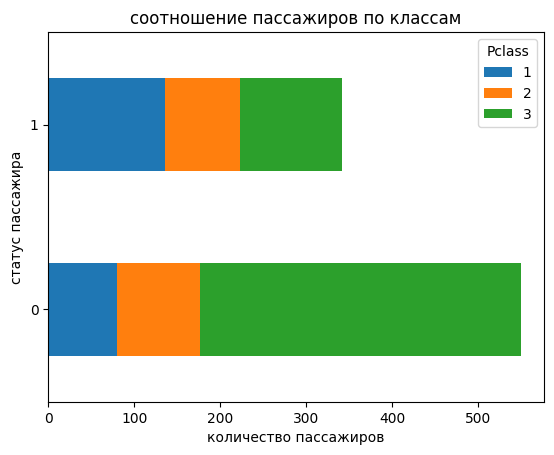

In [ ]:
import matplotlib.pyplot as plt

df_filter = df.groupby(['Survived','Pclass']).size().unstack()

plt.figure(figsize=(12 , 8))
df_filter.plot(kind='barh', stacked=True)
plt.title('соотношение пассажиров по классам')
plt.xlabel('количество пассажиров')
plt.ylabel('статус пассажира')
plt.show()

<Figure size 1200x800 with 0 Axes>

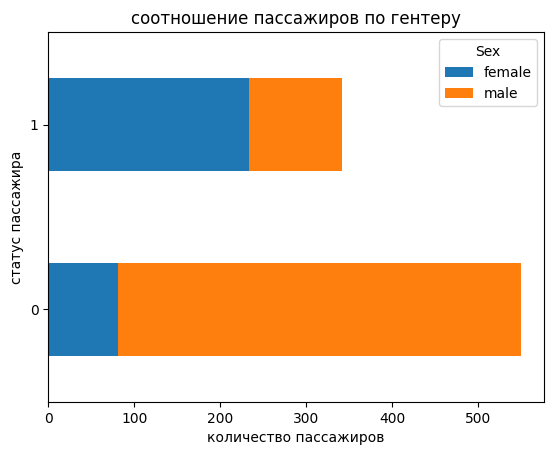

In [ ]:
import matplotlib.pyplot as plt

df_filter = df.groupby(['Survived','Sex']).size().unstack()

plt.figure(figsize=(12 , 8))
df_filter.plot(kind='barh', stacked=True)
plt.title('соотношение пассажиров по гентеру')
plt.xlabel('количество пассажиров')
plt.ylabel('статус пассажира')
plt.show()

<Figure size 1200x800 with 0 Axes>

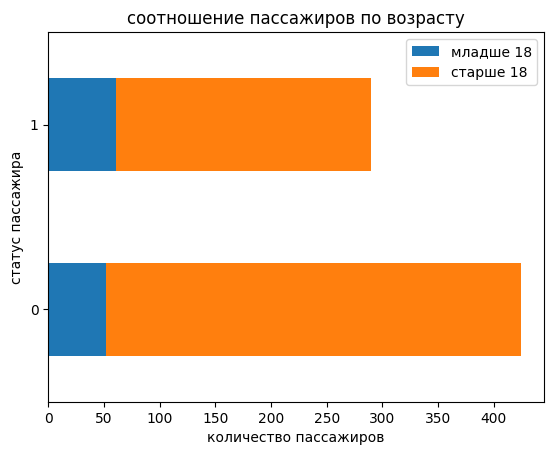

In [ ]:
import matplotlib.pyplot as plt

# Фильтруем данные: младше 18 лет и старше или равные 18 лет
df_18 = df[df['Age'] < 18]
df_not_18 = df[df['Age'] >= 18]

# Группируем и считаем количество выживших/погибших по возрасту
df_group_18 = df_18.groupby('Survived').size()
df_group_not_18 = df_not_18.groupby('Survived').size()

# Объединяем результаты в единую таблицу
df_combo = pd.concat([df_group_18,
                        df_group_not_18], axis=1)


plt.figure(figsize=(12 , 8))
df_combo.plot(kind='barh', stacked=True)
plt.title('соотношение пассажиров по возрасту')
plt.xlabel('количество пассажиров')
plt.ylabel('статус пассажира')
plt.legend(['младше 18','старше 18'])
plt.show()

Из того,что видно на графиках большая часть выживших это женщины 1го и 2го класса, погибшие это мужчины 3го класса. По возрасту неоднозначно, все таки в этой колонке много пропусков, но в целом исторической справке можно верить.  
Теперь подготовим данные, заполним пропуски, посмотрим есть по возрасту выбросы и класс и гентер переведем в числа.

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.mode()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3.0,"Abbing, Mr. Anthony",male,24.0,0.0,0.0,1601,8.05,B96 B98,S
1,2,NaN,NaN,"Abbott, Mr. Rossmore Edward",NaN,NaN,NaN,NaN,347082,NaN,C23 C25 C27,NaN
2,3,NaN,NaN,"Abbott, Mrs. Stanton (Rosa Hunt)",NaN,NaN,NaN,NaN,CA. 2343,NaN,G6,NaN
3,4,NaN,NaN,"Abelson, Mr. Samuel",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,"Abelson, Mrs. Samuel (Hannah Wizosky)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,NaN,NaN,"de Mulder, Mr. Theodore",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
887,888,NaN,NaN,"de Pelsmaeker, Mr. Alfons",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
888,889,NaN,NaN,"del Carlo, Mr. Sebastiano",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
889,890,NaN,NaN,"van Billiard, Mr. Austin Blyler",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


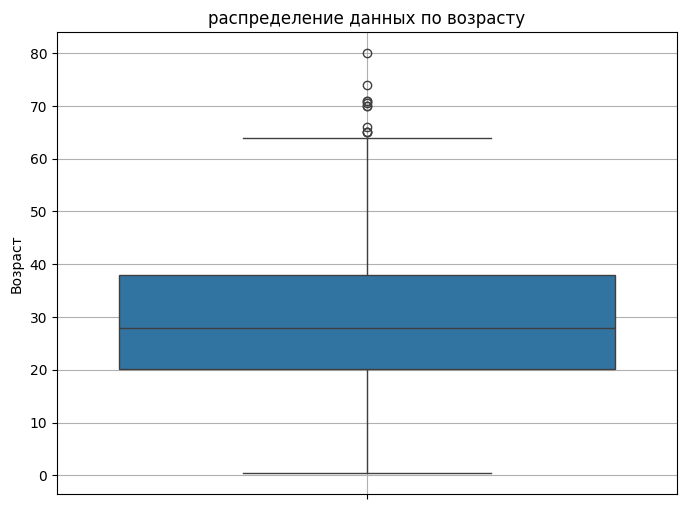

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(y='Age', data=df)
plt.title('распределение данных по возрасту')
plt.ylabel('Возраст')
plt.grid()
plt.show()

В колонке возраста есть выбросы, к тому же мода и медиана ощутимо отличаются. Предпочту использовать медиану,она более устойчива к выбросам. Сами выбросы я предпочту не удалять, опасаюсь что может быть переобучение, все таки некоторый шум в данных не помешает.

In [ ]:
df_fillnan = df.fillna({'Age' : df['Age'].median()} )
df_fillnan.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
from sklearn.preprocessing import LabelEncoder

code = LabelEncoder()
y2 = code.fit_transform(df_fillnan['Survived'])
x2 = pd.get_dummies(df_fillnan[['Pclass','Sex','Age']])

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, random_state=42, test_size=0.2)


model2 = LogisticRegression(max_iter=1000)

model2.fit(x2_train, y2_train)

LogisticRegression(max_iter=1000)

In [ ]:
print(f"точность на обучении: {model2.score(x2_train, y2_train)}")
print(f"точность на тесте: {model2.score(x2_test, y2_test)}")

точность на обучении: 0.7907303370786517
точность на тесте: 0.8100558659217877


После отчистки точность выросла до 0.79 на обучении и 0.81 на тесте. Можно было бы конечно заполнить пропуски в номере каюты и добавить этот столбец в признаки, но тут есть интересный момент...  
У нас есть два столбца с родством пассажиров. Если заполнить пропуски модой или медианой, то может получиться такая ситуация: родители и дети размещенны в разных каютах. Для 3го класса это правило может и не работает, а вот для 1го класса может работать. Богатые пассажиры явно размещались в одной каюте всей семьей и если тут есть какая-то скрытая зависимость, которую я не смог выявить, то модель может ее выявить и это скажеться на точности. Если и добавлять в признаки номер каюты и степени родства, то скорее всего стоит поэкспериментировать с заполнением следующим либо предыдущим значением.